# Community Clustering Plots

In [ ]:
import pandas as pd

from sklearn.preprocessing import quantile_transform as qt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

## Load in proxy data

In [4]:
proxy = "../data/proxy_outcomes.csv"

In [5]:
proxy_outcomes=pd.read_csv(proxy)

# Severity

## Load in data

In [72]:
severity="../../covid_community_vulnerability/data/severe_cases_score_data.csv"

In [73]:
file=pd.read_csv(severity).drop('Unnamed: 0',axis=1).dropna()

In [74]:
file.columns

Index(['FIPS', 'State', 'County', 'Severe COVID Case Complications',
       'covid_cases', '% Adults 65 and Older', '% Diagnosed Diabetes',
       '% Adults with Obesity', 'Heart Disease Death Rate',
       'Hypertension Death Rate', 'COPD Mortality Rate', '% Smokers'],
      dtype='object')

In [75]:
data=file[file.columns[4:]]

In [76]:
data.columns

Index(['covid_cases', '% Adults 65 and Older', '% Diagnosed Diabetes',
       '% Adults with Obesity', 'Heart Disease Death Rate',
       'Hypertension Death Rate', 'COPD Mortality Rate', '% Smokers'],
      dtype='object')

In [77]:
severity_score = file[['Severe COVID Case Complications']]

## Normalize Data

In [78]:
X_norm1=qt(data, n_quantiles=5, random_state=13, copy=False)

In [79]:
new_data=pd.DataFrame(data=X_norm1,columns=data.columns.tolist())

## Elbow Method

In [ ]:
wcss = []  #Within-Cluster-Sum-of-Squares
end=8
for i in range(2,end):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_norm1)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)

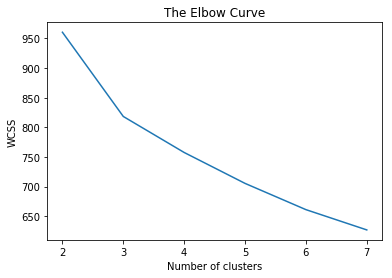

In [81]:
plt.plot(range(2,end),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

In [ ]:
slc =  {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X_norm1)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
    slc[k] = silhouette_score(X_norm1,clusters)

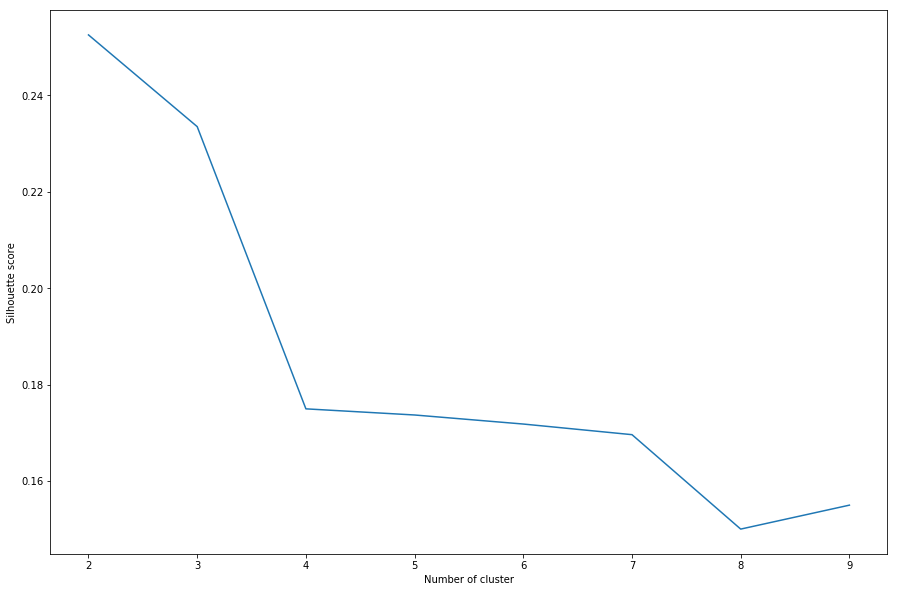

In [83]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

## Elbow formed and significant drop in silhouette score at 3

In [ ]:
model=  KMeans(
               n_clusters=3,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
model.fit(new_data)
label=pd.DataFrame(model.labels_)

In [ ]:
new_data['class']=label
severity_score['class']=label

In [86]:
new_data['class'].value_counts()

1    1443
2     929
0     770
Name: class, dtype: int64

## Boxplot

In [87]:
columns=new_data.columns[:-1]

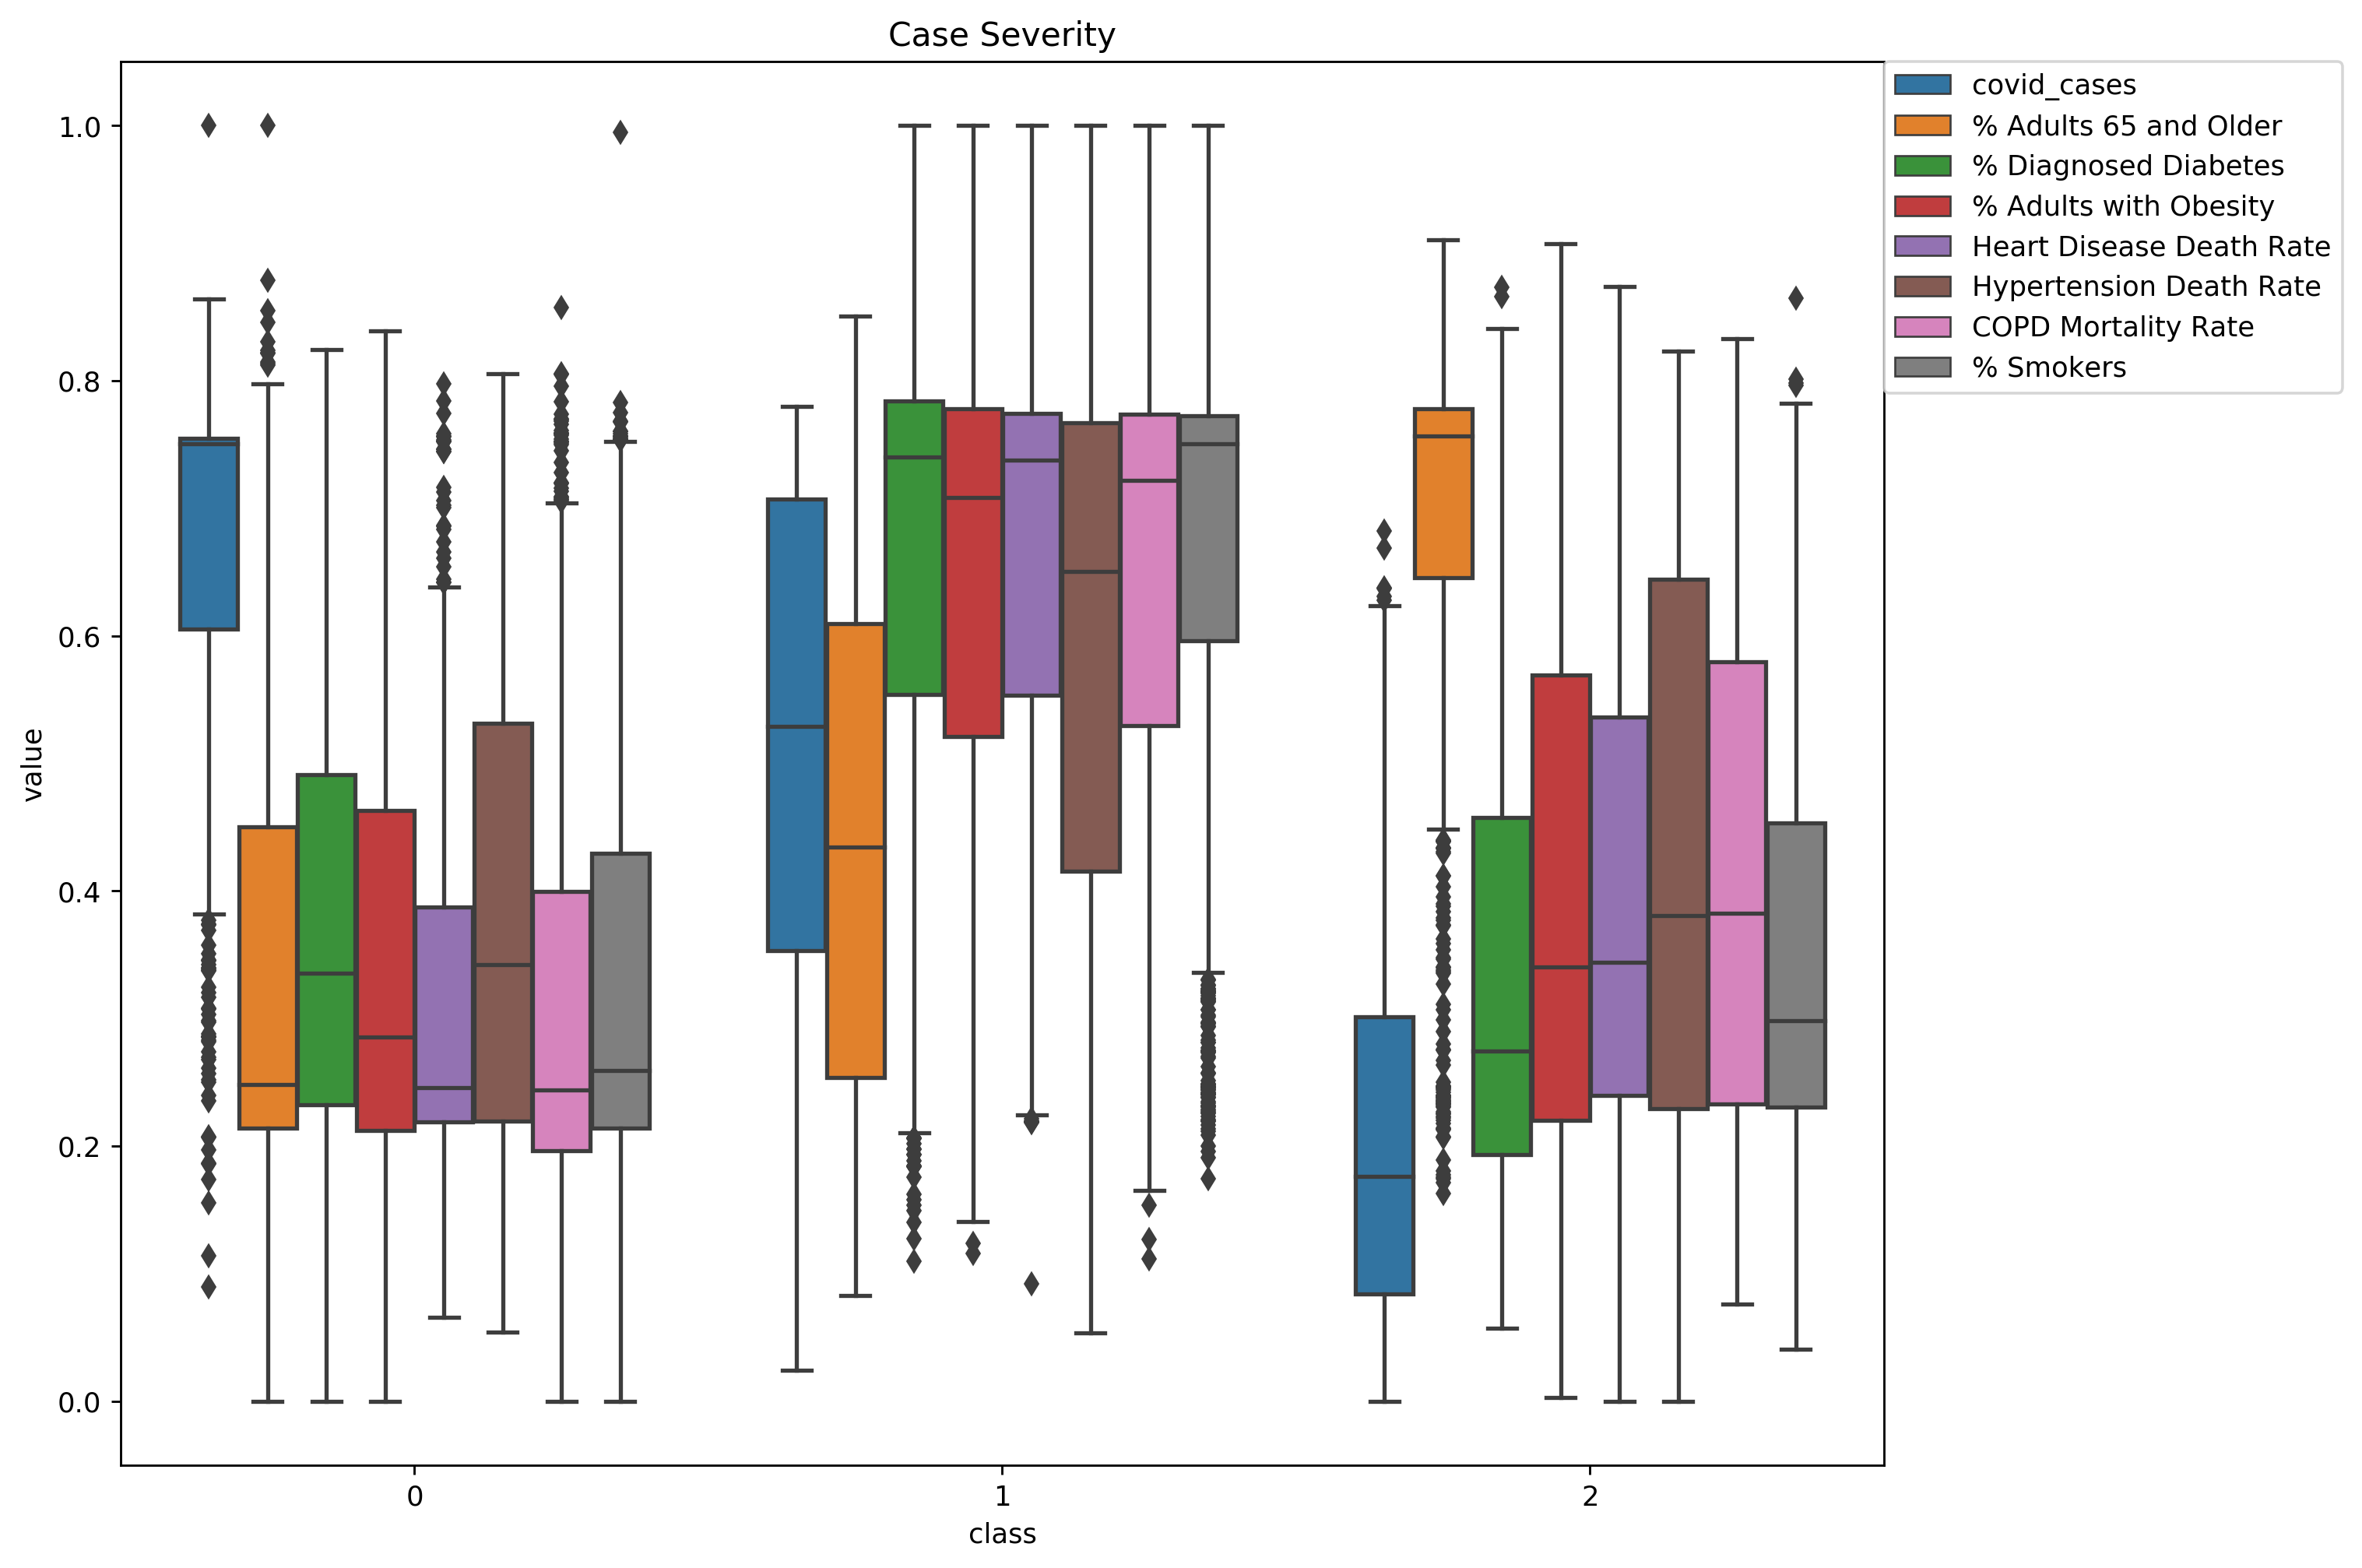

In [25]:
plt.figure(frameon=False,figsize=(12,8),dpi=255)
dd=pd.melt(new_data,id_vars=['class'],value_vars=columns,var_name='boxplot',)
sns.boxplot(x='class',y='value',data=dd,hue='boxplot',)
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0,)
plt.title("Case Severity")
plt.tight_layout()

## Severity Score  distributions per cluster

Text(0.5, 1.0, 'Cluster 0: Severe COVID Case Complications')

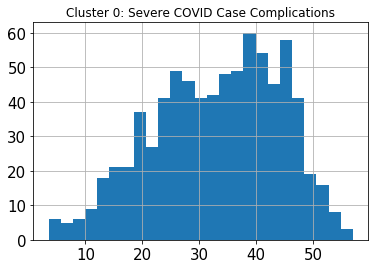

In [22]:
severity_score[severity_score["class"].isin([0])]["Severe COVID Case Complications"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 0: Severe COVID Case Complications")

Text(0.5, 1.0, 'Cluster 1: Severe COVID Case Complications')

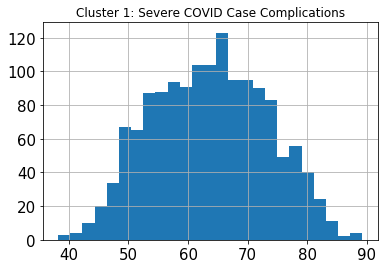

In [23]:
severity_score[severity_score["class"].isin([1])]["Severe COVID Case Complications"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 1: Severe COVID Case Complications")

Text(0.5, 1.0, 'Cluster 2: Severe COVID Case Complications')

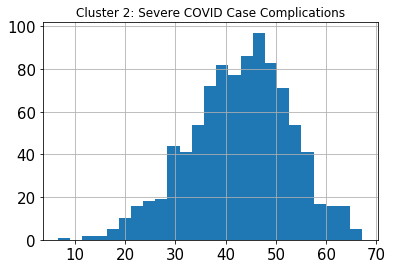

In [24]:
severity_score[severity_score["class"].isin([2])]["Severe COVID Case Complications"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 2: Severe COVID Case Complications")

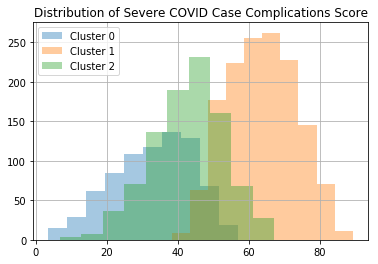

In [88]:
severity_score[severity_score["class"].isin([0])]["Severe COVID Case Complications"].hist(alpha=.4)
severity_score[severity_score["class"].isin([1])]["Severe COVID Case Complications"].hist(alpha=.4)
severity_score[severity_score["class"].isin([2])]["Severe COVID Case Complications"].hist(alpha=.4)
plt.title("Distribution of Severe COVID Case Complications Score")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"])

## Hospitalization distributions by cluster

In [89]:
proxy_outcomes['severity_class'] = label

In [90]:
hospitalizations = proxy_outcomes[['Hospitalization Rate per 100,000', 'severity_class']]
hospitalizations = hospitalizations.dropna()

Text(0.5, 1.0, 'Cluster 0: Hospitalization Rate per 100,000')

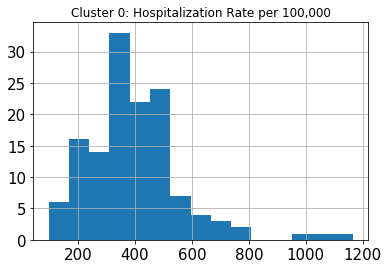

In [41]:
hospitalizations[hospitalizations["severity_class"].isin([0])]["Hospitalization Rate per 100,000"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 0: Hospitalization Rate per 100,000")

Text(0.5, 1.0, 'Cluster 1: Hospitalization Rate per 100,000')

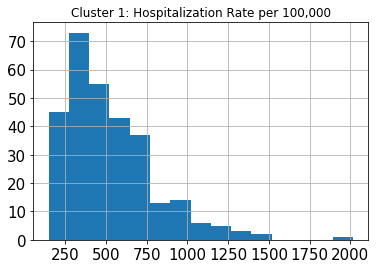

In [28]:
hospitalizations[hospitalizations["severity_class"].isin([1])]["Hospitalization Rate per 100,000"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 1: Hospitalization Rate per 100,000")

Text(0.5, 1.0, 'Cluster 2: Hospitalization Rate per 100,000')

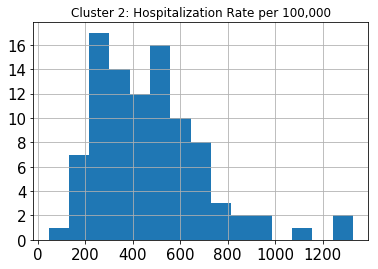

In [29]:
hospitalizations[hospitalizations["severity_class"].isin([2])]["Hospitalization Rate per 100,000"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 2: Hospitalization Rate per 100,000")

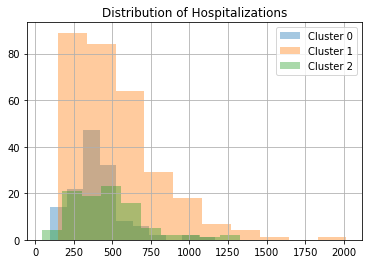

In [91]:
hospitalizations[hospitalizations["severity_class"].isin([0])]["Hospitalization Rate per 100,000"].hist(alpha=.4)
hospitalizations[hospitalizations["severity_class"].isin([1])]["Hospitalization Rate per 100,000"].hist(alpha=.4)
hospitalizations[hospitalizations["severity_class"].isin([2])]["Hospitalization Rate per 100,000"].hist(alpha=.4)

plt.title("Distribution of Hospitalizations")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"])

# Economic Harm

In [44]:
economic="../../covid_community_vulnerability/data/economic_score_data.csv"

In [45]:
file=pd.read_csv(economic).drop('Unnamed: 0',axis=1)

In [46]:
file = file.merge(proxy_outcomes)

In [47]:
file = file[file['Risk of Severe Economic Harm'].isna() == False]

In [48]:
economic_score = file[['Risk of Severe Economic Harm']].reset_index(drop=True)

In [49]:
economic_proxy = file[['Unemployment Initial Claims']].reset_index(drop=True)

In [50]:
file.columns

Index(['FIPS', 'State', 'County', 'Risk of Severe Economic Harm',
       '% Below Poverty', 'Median Household Income', '% No College Degree',
       'Unemployment Rate', '% Not in Labor Force',
       '% Jobs in Leisure and Hospitality', '% Part-time', '% Self-Employed',
       'Hospitalization Rate per 100,000', 'Unemployment Initial Claims',
       'Hospitals per 100,000', 'severity_class'],
      dtype='object')

In [51]:
data=file[file.columns[4:12]]

In [52]:
data.columns

Index(['% Below Poverty', 'Median Household Income', '% No College Degree',
       'Unemployment Rate', '% Not in Labor Force',
       '% Jobs in Leisure and Hospitality', '% Part-time', '% Self-Employed'],
      dtype='object')

In [53]:
data.shape

(3141, 8)

## Normalize Data

In [ ]:
data['Median Household Income'] = data['Median Household Income'].replace('[\$,]', '', regex=True).astype(float)

In [55]:
X_norm1=qt(data, n_quantiles=5, random_state=13, copy=False)

In [56]:
new_data=pd.DataFrame(data=X_norm1,columns=data.columns.tolist())

## Elbow Method

In [ ]:
wcss = []  #Within-Cluster-Sum-of-Squares
end=8
for i in range(2,end):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_norm1)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)

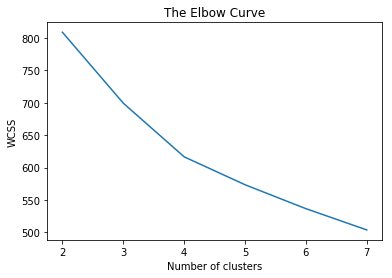

In [58]:
plt.plot(range(2,end),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

In [ ]:
slc =  {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X_norm1)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
    slc[k] = silhouette_score(X_norm1,clusters)

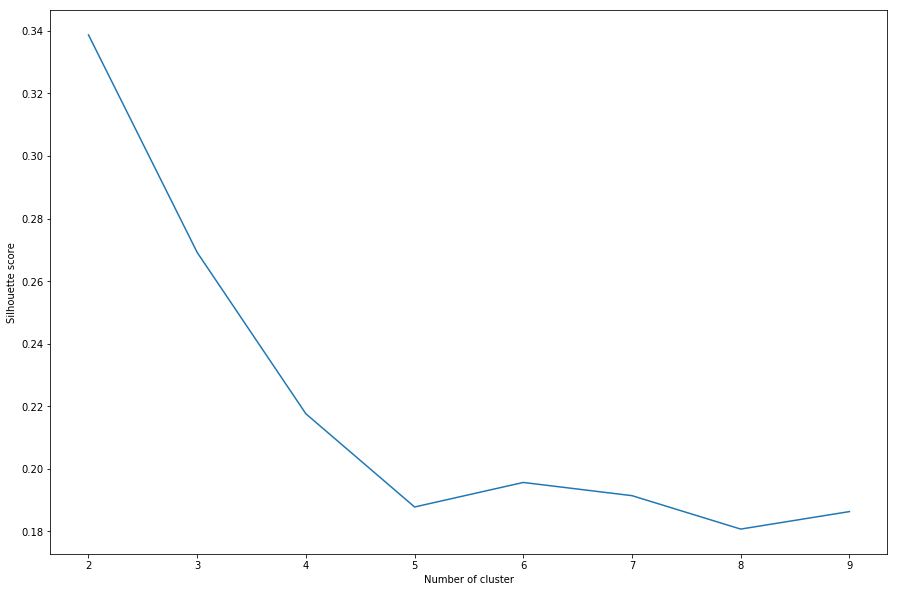

In [60]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

## Elbow formed at 4

In [ ]:
model=  KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
model.fit(new_data)
label=pd.DataFrame(model.labels_)

In [62]:
new_data['class']=label
economic_score['class']=label

In [63]:
new_data['class'].value_counts()

1    887
3    839
2    786
0    629
Name: class, dtype: int64

## Boxplots

In [64]:
columns=new_data.columns[:-1]

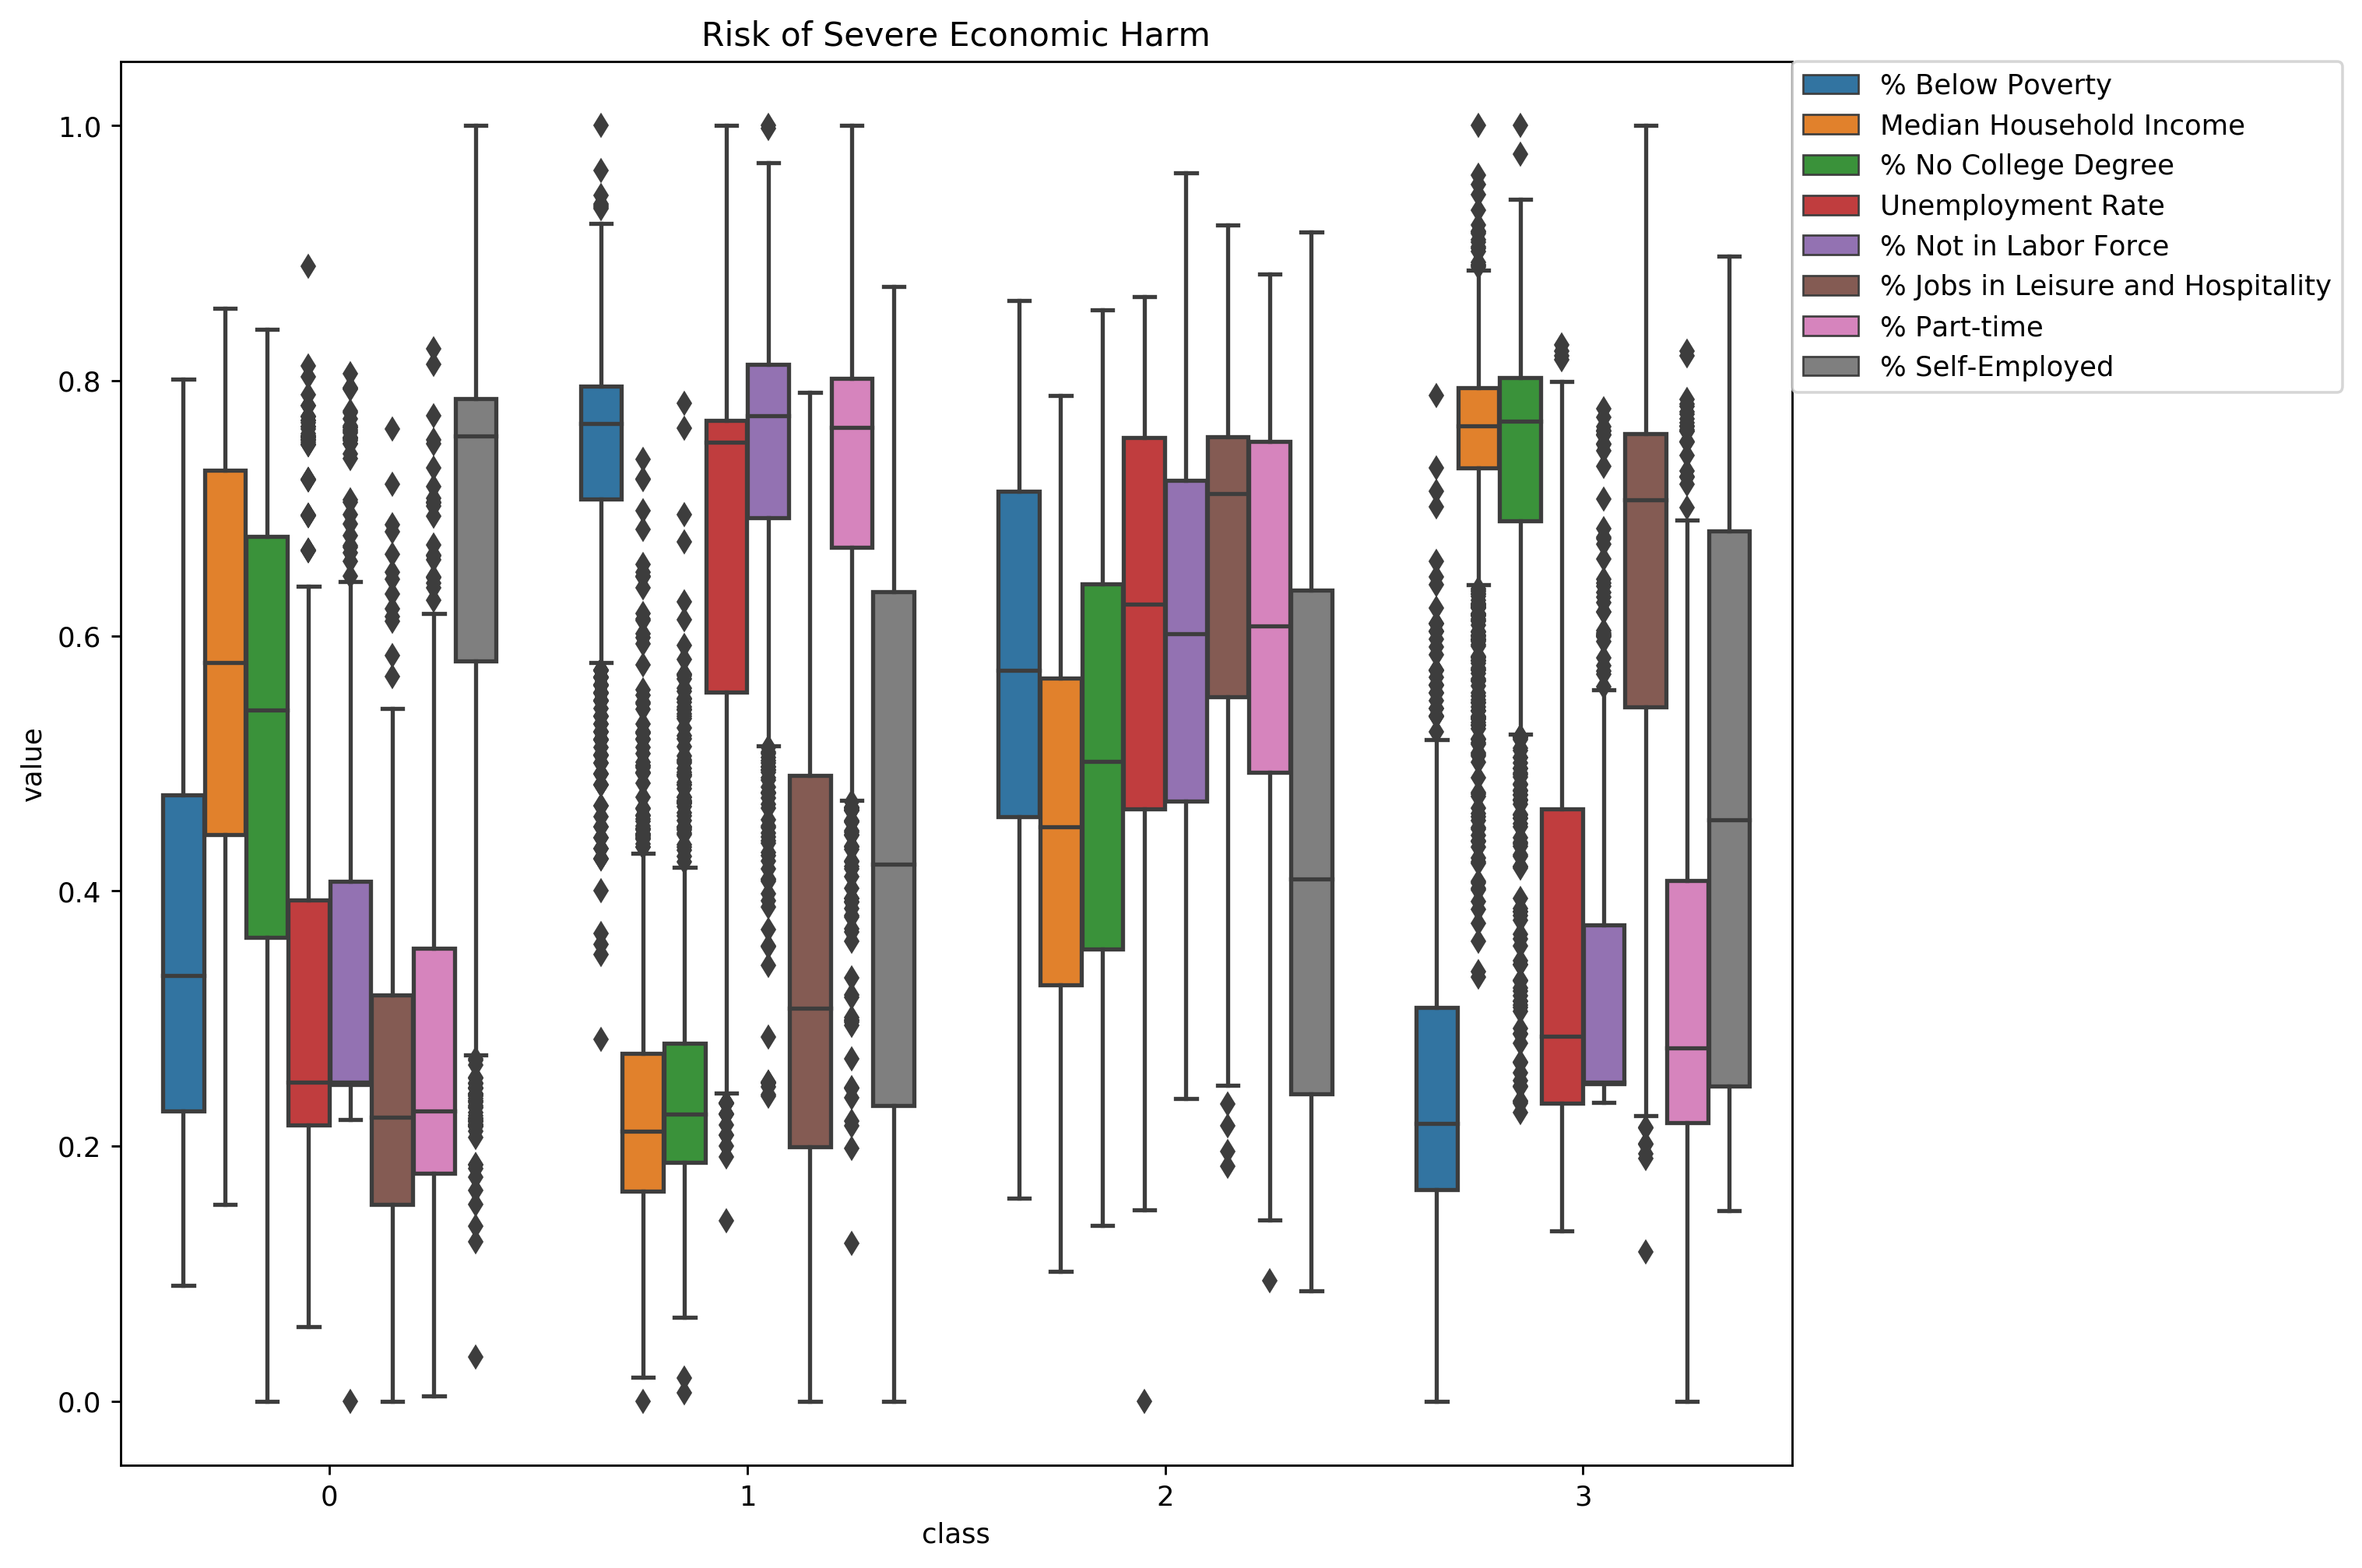

In [65]:
plt.figure(frameon=False,figsize=(12,8),dpi=255)
dd=pd.melt(new_data,id_vars=['class'],value_vars=columns,var_name='boxplot',)
sns.boxplot(x='class',y='value',data=dd,hue='boxplot',)
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0,)
plt.title("Risk of Severe Economic Harm")
plt.tight_layout()

## Economic Harm Score distributions per cluster

Text(0.5, 1.0, 'Cluster 0: Risk of Severe Economic Harm')

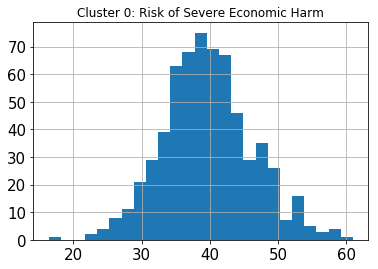

In [52]:
economic_score[economic_score["class"].isin([0])]["Risk of Severe Economic Harm"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 0: Risk of Severe Economic Harm")

Text(0.5, 1.0, 'Cluster 1: Risk of Severe Economic Harm')

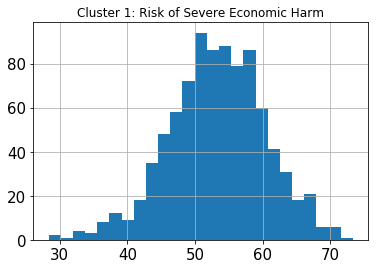

In [53]:
economic_score[economic_score["class"].isin([1])]["Risk of Severe Economic Harm"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 1: Risk of Severe Economic Harm")

Text(0.5, 1.0, 'Cluster 2: Risk of Severe Economic Harm')

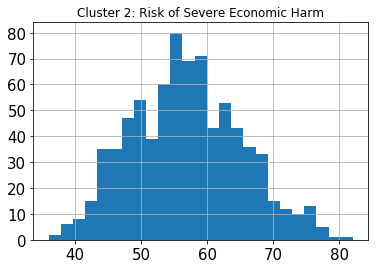

In [54]:
economic_score[economic_score["class"].isin([2])]["Risk of Severe Economic Harm"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 2: Risk of Severe Economic Harm")

Text(0.5, 1.0, 'Cluster 3: Risk of Severe Economic Harm')

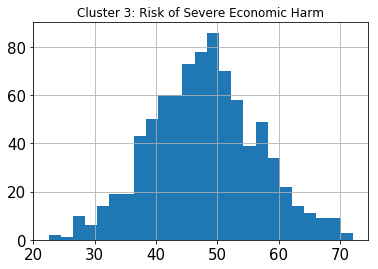

In [55]:
economic_score[economic_score["class"].isin([3])]["Risk of Severe Economic Harm"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 3: Risk of Severe Economic Harm")

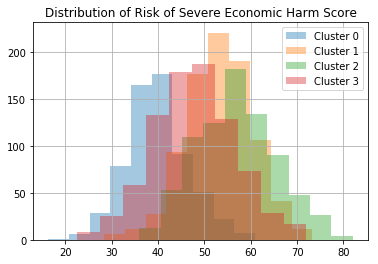

In [68]:
economic_score[economic_score["class"].isin([0])]["Risk of Severe Economic Harm"].hist(alpha=.4)
economic_score[economic_score["class"].isin([1])]["Risk of Severe Economic Harm"].hist(alpha=.4)
economic_score[economic_score["class"].isin([2])]["Risk of Severe Economic Harm"].hist(alpha=.4)
economic_score[economic_score["class"].isin([3])]["Risk of Severe Economic Harm"].hist(alpha=.4)

plt.title("Distribution of Risk of Severe Economic Harm Score")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])

## Unemployment Claims distributions by cluster

In [69]:
economic_proxy['class']=label

In [70]:
economic_proxy = economic_proxy.dropna()

Text(0.5, 1.0, 'Cluster 0: Unemployment Initial Claims')

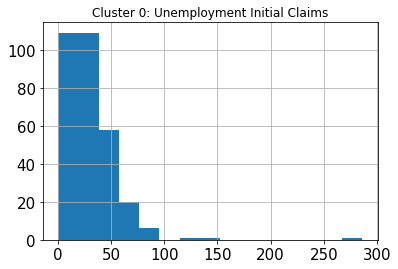

In [58]:
economic_proxy[economic_proxy["class"].isin([0])]["Unemployment Initial Claims"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 0: Unemployment Initial Claims")

Text(0.5, 1.0, 'Cluster 1: Unemployment Initial Claims')

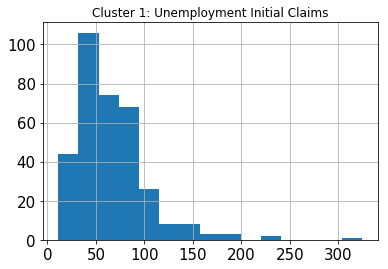

In [59]:
economic_proxy[economic_proxy["class"].isin([1])]["Unemployment Initial Claims"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 1: Unemployment Initial Claims")

Text(0.5, 1.0, 'Cluster 2: Unemployment Initial Claims')

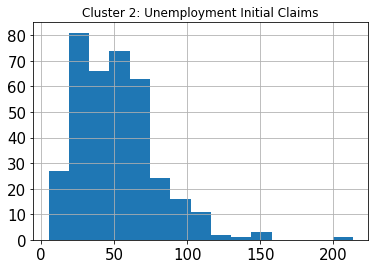

In [60]:
economic_proxy[economic_proxy["class"].isin([2])]["Unemployment Initial Claims"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 2: Unemployment Initial Claims")

Text(0.5, 1.0, 'Cluster 3: Unemployment Initial Claims')

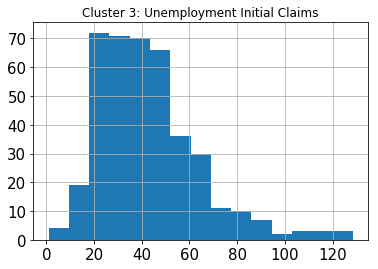

In [61]:
economic_proxy[economic_proxy["class"].isin([3])]["Unemployment Initial Claims"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 3: Unemployment Initial Claims")

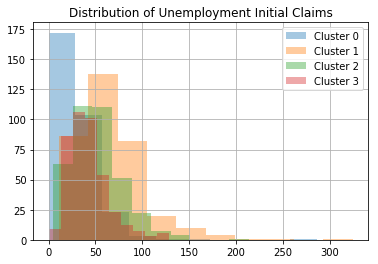

In [71]:
economic_proxy[economic_proxy["class"].isin([0])]["Unemployment Initial Claims"].hist(alpha=.4)
economic_proxy[economic_proxy["class"].isin([1])]["Unemployment Initial Claims"].hist(alpha=.4)
economic_proxy[economic_proxy["class"].isin([2])]["Unemployment Initial Claims"].hist(alpha=.4)
economic_proxy[economic_proxy["class"].isin([3])]["Unemployment Initial Claims"].hist(alpha=.4)

plt.title("Distribution of Unemployment Initial Claims")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])

## Mobile Health

In [95]:
mobile="../../covid_community_vulnerability/data/mobile_health_score_data.csv"

In [96]:
file=pd.read_csv(mobile).drop('Unnamed: 0',axis=1)

In [97]:
file = file.merge(proxy_outcomes)

In [98]:
file = file[file['Need for Mobile Health Resources'].isna() == False]

In [99]:
mobile_score = file[['Need for Mobile Health Resources']].reset_index(drop=True)

In [100]:
mobile_proxy = file[['Hospitals per 100,000']].reset_index(drop=True)

In [101]:
file.columns

Index(['FIPS', 'State', 'County', 'Need for Mobile Health Resources',
       '% Rural', '% households wo car',
       '% workers commuting by public transit', 'Primary Care Physicians Rate',
       '% Without Health Insurance', '% Nonwhite',
       '% Limited English Proficiency',
       '% Veterans in Civilian Adult Population', '% Adults 65 and Older',
       '% disabled', 'opioid death rate', '% Fair or Poor Health',
       'Number of Hospitals', 'Hospitalization Rate per 100,000',
       'Unemployment Initial Claims', 'Hospitals per 100,000',
       'severity_class'],
      dtype='object')

In [102]:
data=file[file.columns[4:17]]

In [103]:
data.columns

Index(['% Rural', '% households wo car',
       '% workers commuting by public transit', 'Primary Care Physicians Rate',
       '% Without Health Insurance', '% Nonwhite',
       '% Limited English Proficiency',
       '% Veterans in Civilian Adult Population', '% Adults 65 and Older',
       '% disabled', 'opioid death rate', '% Fair or Poor Health',
       'Number of Hospitals'],
      dtype='object')

In [104]:
data.shape

(2990, 13)

## Normalize Data

In [105]:
X_norm1=qt(data, n_quantiles=5, random_state=13, copy=False)

In [106]:
new_data=pd.DataFrame(data=X_norm1,columns=data.columns.tolist())

## Elbow Method

In [ ]:
wcss = []  #Within-Cluster-Sum-of-Squares
end=8
for i in range(2,end):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_norm1)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)

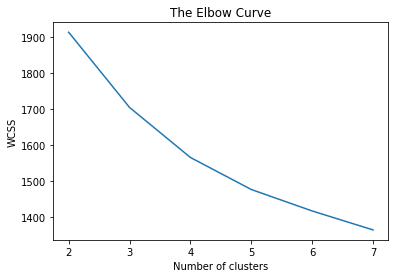

In [108]:
plt.plot(range(2,end),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

In [ ]:
slc =  {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X_norm1)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
    slc[k] = silhouette_score(X_norm1,clusters)

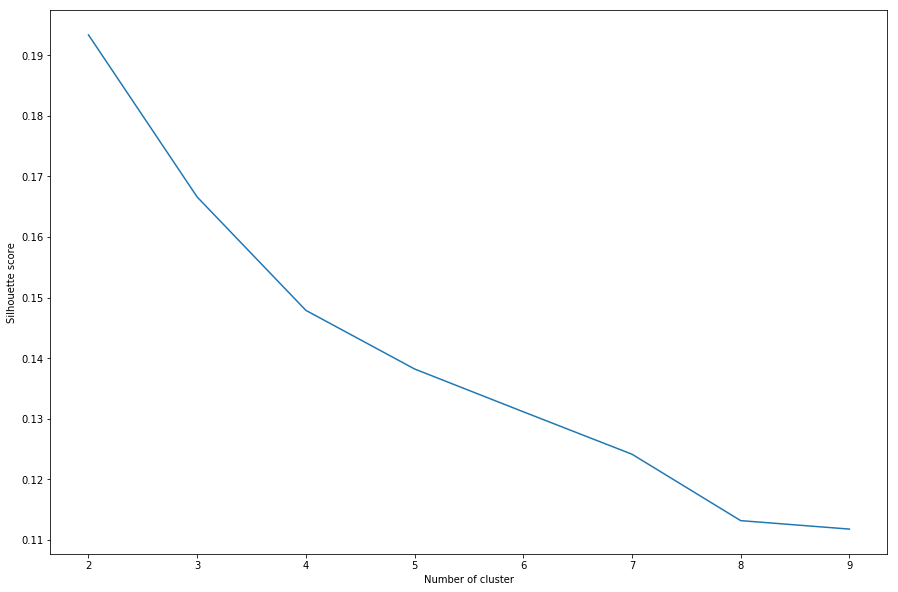

In [110]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

## Elbow formed at 4

In [ ]:
model=  KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
model.fit(new_data)
label=pd.DataFrame(model.labels_)

In [112]:
new_data['class']=label
mobile_score['class']=label

In [113]:
new_data['class'].value_counts()

1    795
3    789
2    755
0    651
Name: class, dtype: int64

## Boxplots

In [114]:
columns=new_data.columns[:-1]

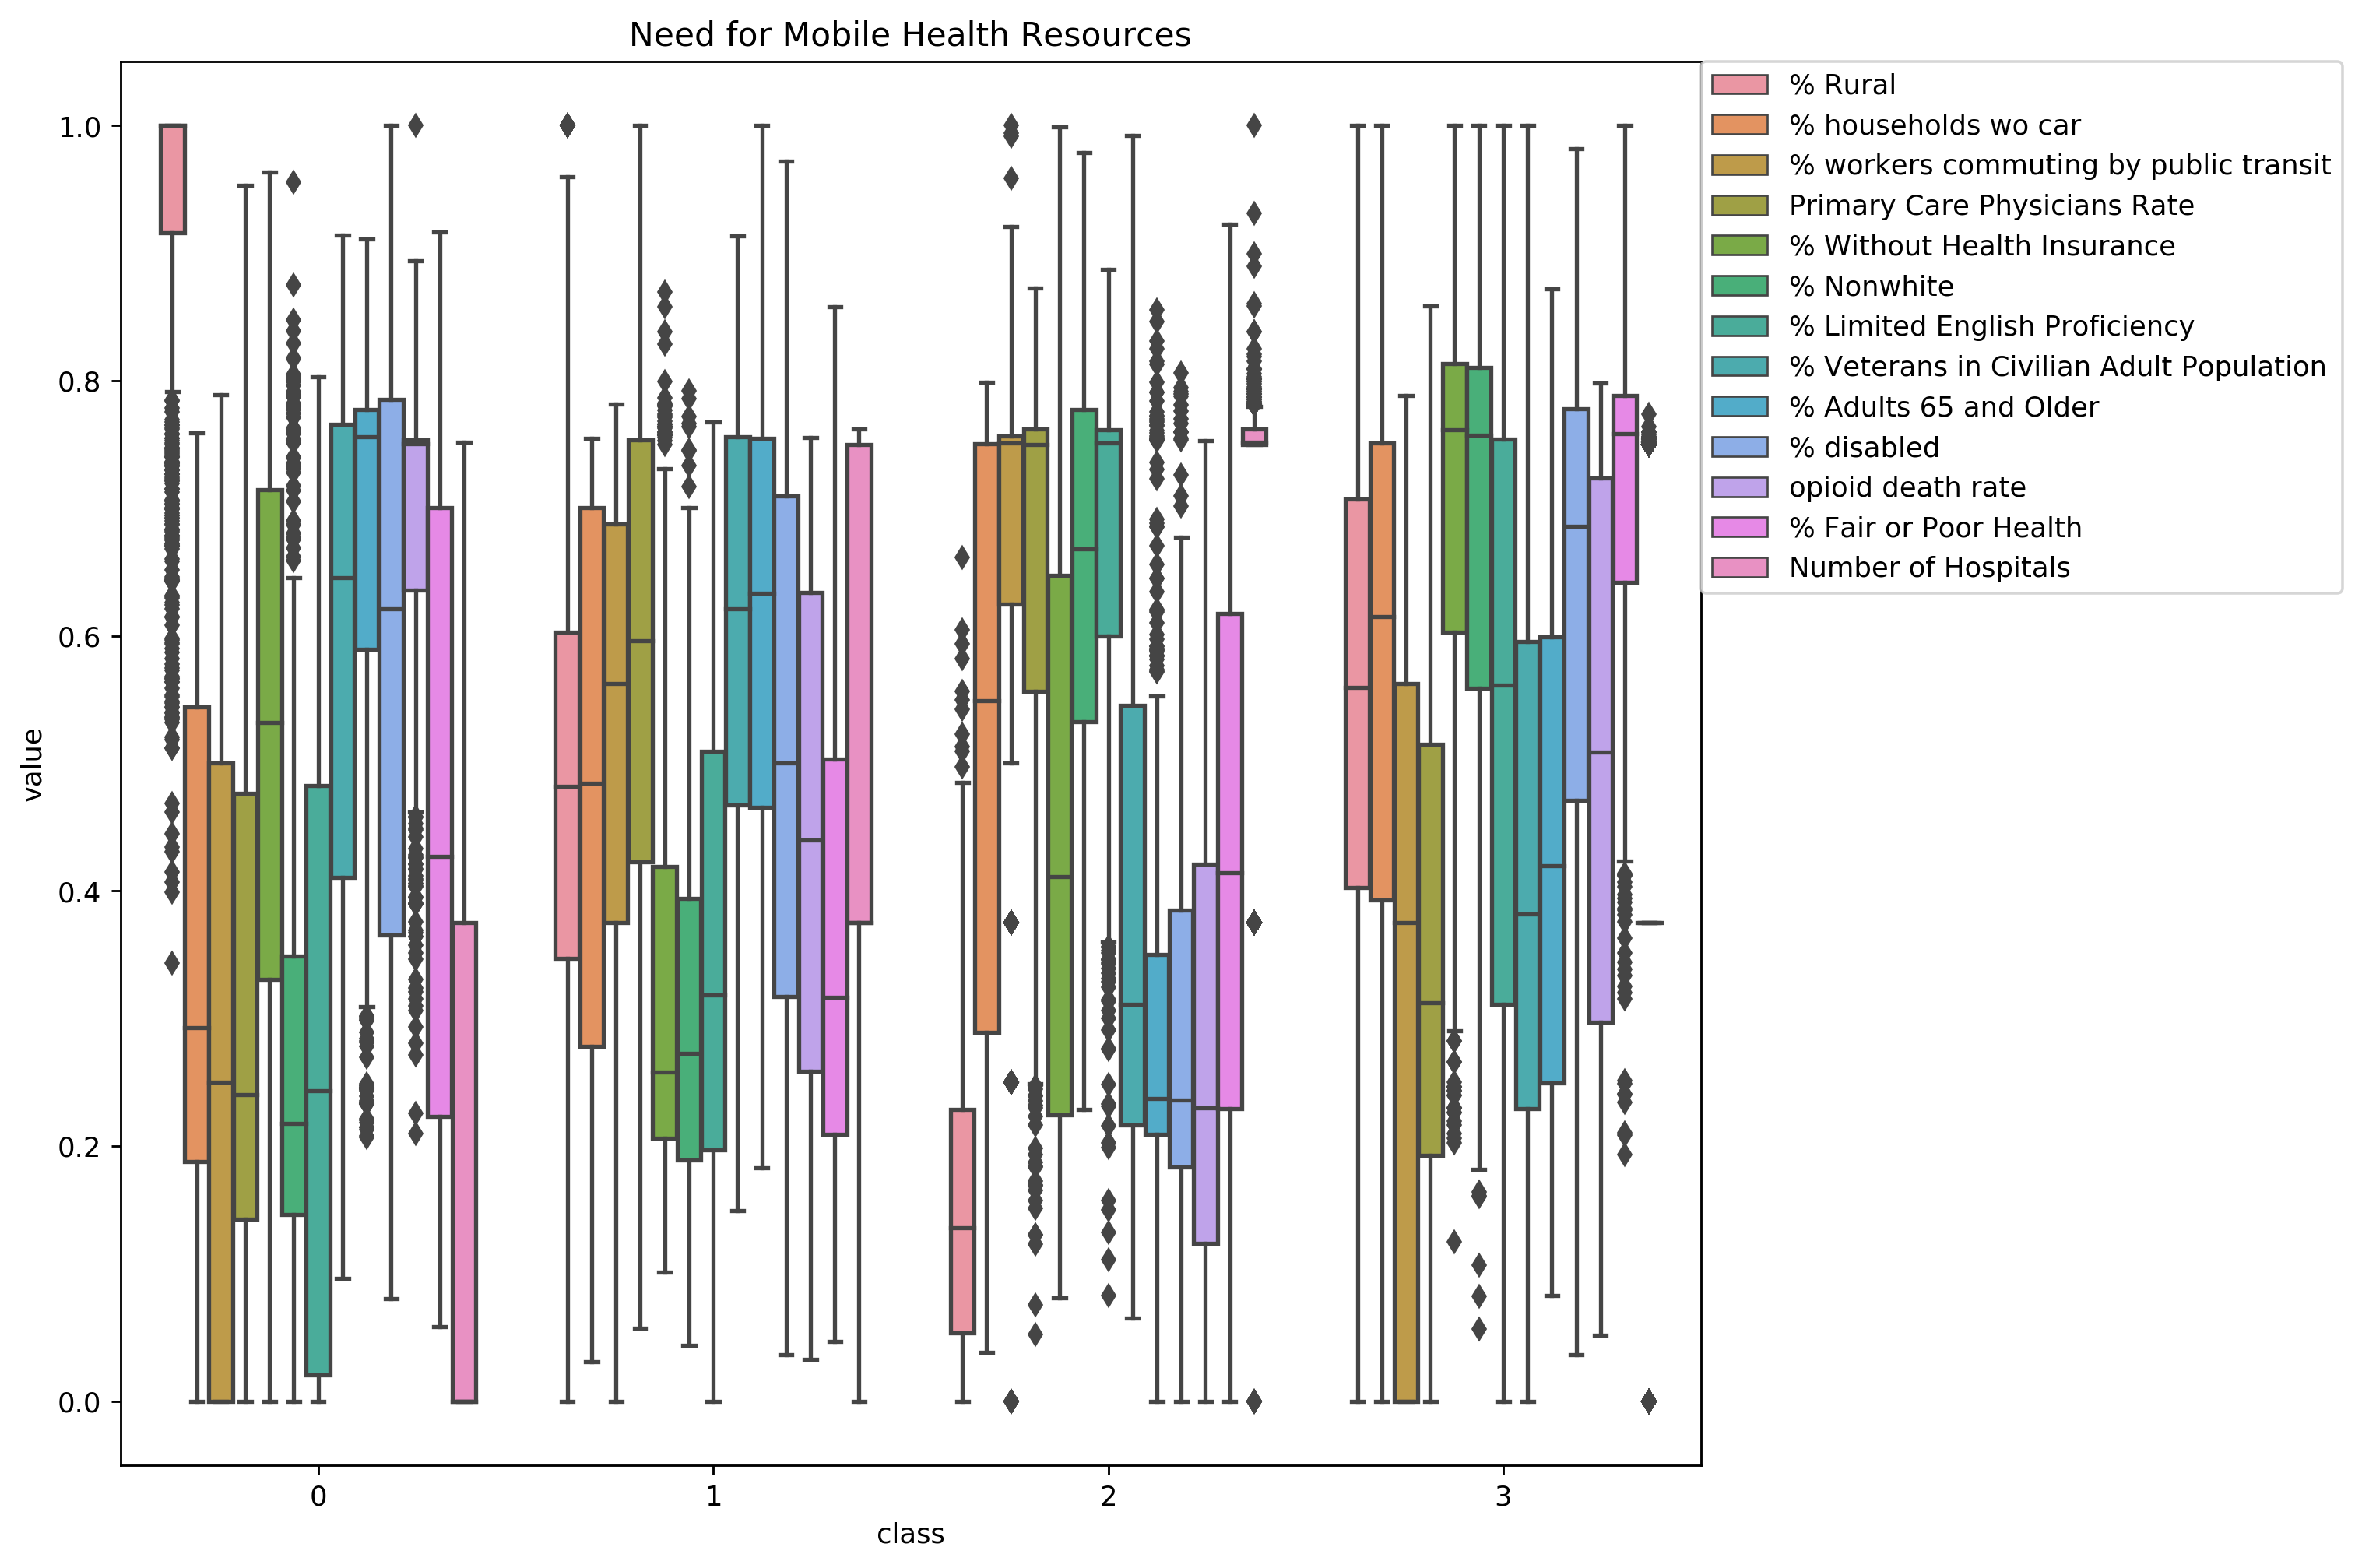

In [115]:
plt.figure(frameon=False,figsize=(12,8),dpi=255)
dd=pd.melt(new_data,id_vars=['class'],value_vars=columns,var_name='boxplot',)
sns.boxplot(x='class',y='value',data=dd,hue='boxplot',)
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0,)
plt.title("Need for Mobile Health Resources")
plt.tight_layout()

## Mobile Health Needs Score distributions per cluster

Text(0.5, 1.0, 'Cluster 0: Need for Mobile Health Resources')

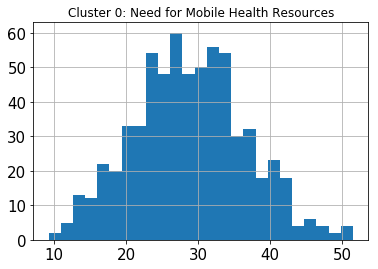

In [85]:
mobile_score[mobile_score["class"].isin([0])]["Need for Mobile Health Resources"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 0: Need for Mobile Health Resources")

Text(0.5, 1.0, 'Cluster 1: Need for Mobile Health Resources')

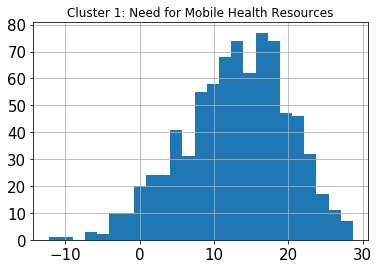

In [86]:
mobile_score[mobile_score["class"].isin([1])]["Need for Mobile Health Resources"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 1: Need for Mobile Health Resources")

Text(0.5, 1.0, 'Cluster 2: Need for Mobile Health Resources')

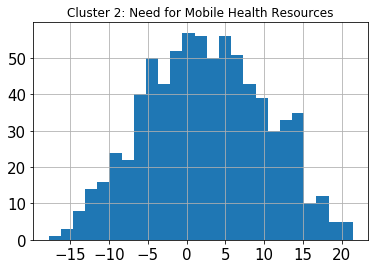

In [87]:
mobile_score[mobile_score["class"].isin([2])]["Need for Mobile Health Resources"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 2: Need for Mobile Health Resources")

Text(0.5, 1.0, 'Cluster 3: Need for Mobile Health Resources')

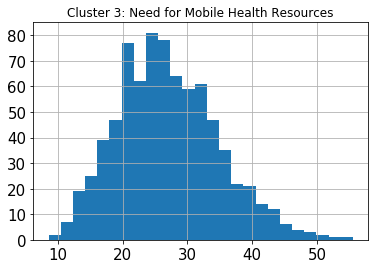

In [88]:
mobile_score[mobile_score["class"].isin([3])]["Need for Mobile Health Resources"].hist(xlabelsize=15,ylabelsize=15,bins=25)
plt.title("Cluster 3: Need for Mobile Health Resources")

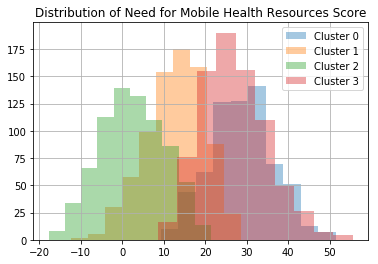

In [116]:
mobile_score[mobile_score["class"].isin([0])]["Need for Mobile Health Resources"].hist(alpha=.4)
mobile_score[mobile_score["class"].isin([1])]["Need for Mobile Health Resources"].hist(alpha=.4)
mobile_score[mobile_score["class"].isin([2])]["Need for Mobile Health Resources"].hist(alpha=.4)
mobile_score[mobile_score["class"].isin([3])]["Need for Mobile Health Resources"].hist(alpha=.4)

plt.title("Distribution of Need for Mobile Health Resources Score")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])

## Hospitals per 100,000 distributions by cluster

In [117]:
mobile_proxy['class']=label

Text(0.5, 1.0, 'Cluster 0: Hospitals per 100,000')

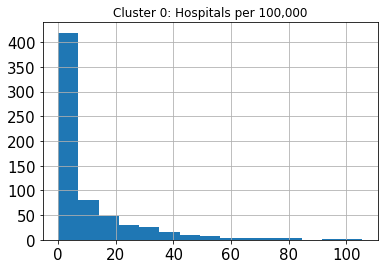

In [118]:
mobile_proxy[mobile_proxy["class"].isin([0])]["Hospitals per 100,000"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 0: Hospitals per 100,000")

Text(0.5, 1.0, 'Cluster 1: Hospitals per 100,000')

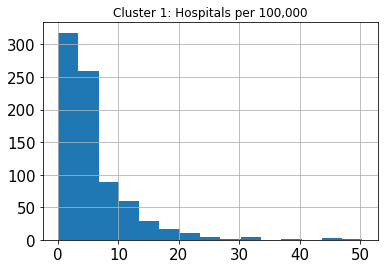

In [91]:
mobile_proxy[mobile_proxy["class"].isin([1])]["Hospitals per 100,000"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 1: Hospitals per 100,000")

Text(0.5, 1.0, 'Cluster 2: Hospitals per 100,000')

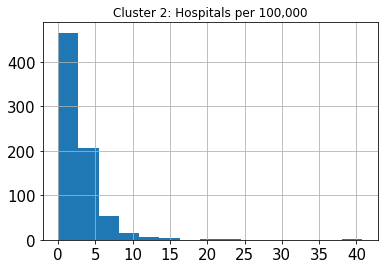

In [92]:
mobile_proxy[mobile_proxy["class"].isin([2])]["Hospitals per 100,000"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 2: Hospitals per 100,000")

Text(0.5, 1.0, 'Cluster 3: Hospitals per 100,000')

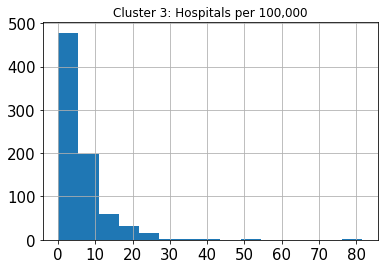

In [93]:
mobile_proxy[mobile_proxy["class"].isin([3])]["Hospitals per 100,000"].hist(xlabelsize=15,ylabelsize=15,bins=15)
plt.title("Cluster 3: Hospitals per 100,000")

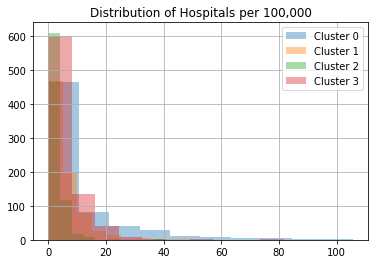

In [120]:
mobile_proxy[mobile_proxy["class"].isin([0])]["Hospitals per 100,000"].hist(alpha=.4)
mobile_proxy[mobile_proxy["class"].isin([1])]["Hospitals per 100,000"].hist(alpha=.4)
mobile_proxy[mobile_proxy["class"].isin([2])]["Hospitals per 100,000"].hist(alpha=.4)
mobile_proxy[mobile_proxy["class"].isin([3])]["Hospitals per 100,000"].hist(alpha=.4)

plt.title("Distribution of Hospitals per 100,000")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])